# Machine Learning Practice : Iris Classification

import neceecessary libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, svm, metrics

Loading dataset

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [4]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [7]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [8]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [10]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [11]:
print("Target:\n{}".format(iris_dataset['target']))


Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Training and Testing Data

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)


In [13]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [14]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_test shape: (38, 4)
y_test shape: (38,)


Look at Your Data

c:\Users\M. Albar Ghiffar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\M. Albar Ghiffar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\M. Albar Ghiffar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
c:\Users\M. Albar Ghiffar\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may prod

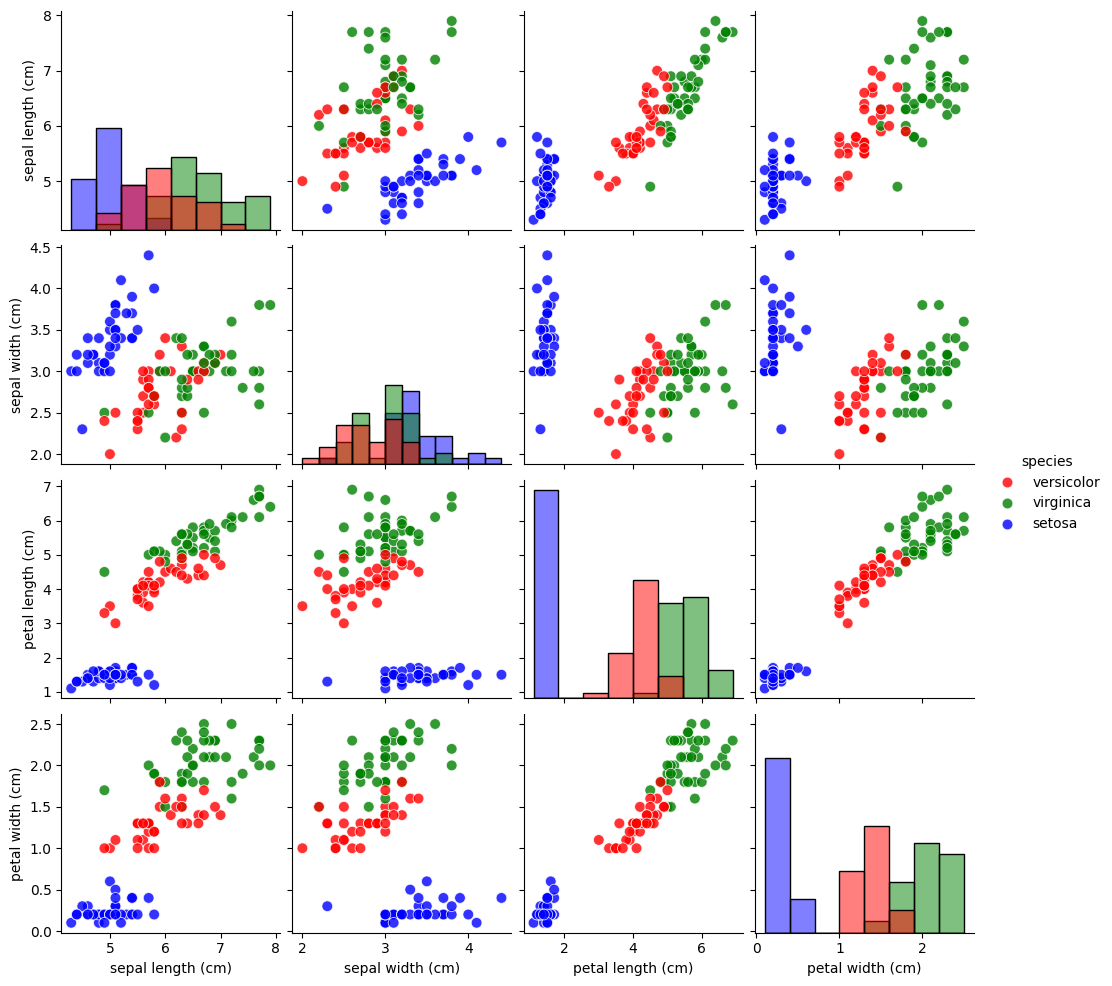

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris_dataset = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

# Create a DataFrame from the training data
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# Map y_train to species names and add it to the DataFrame
iris_dataframe["species"] = pd.Series(y_train).map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Custom color palette to match the expected style
custom_palette = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'green'}

# Create a scatter matrix from the DataFrame, colored by species
sns.pairplot(iris_dataframe, hue="species", 
             diag_kind='hist', markers=['o'], palette=custom_palette, 
             plot_kws={'s': 60, 'alpha': .8}, height=2.5)  # Adjust size for better visibility

plt.show()

First Model : K-Nearest Neighbour

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

Making Predictions

In [39]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [40]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
 iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Evaluating the Model

In [41]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [42]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [43]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Summary

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
